# PROSJEKT - TFY4163

Av Eirik Endresen, Rebekka Bø og Viktor Sandve

In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Initializing constants and variables

l = 1
g = 9.8
theta_0 = 0.2
w_0 = 0
q = 1
w_D = 3.13
F_Dml = 0.2
w_sys = np.sqrt(g/l) #the natural frequency of the system



In [3]:
def k(theta, w,  t):
    return F_Dml * np.sin(w_D*t) - g/l*theta - q*w
    
def f(w):
    return w

def RK4_step(k, f, theta, w, t, dt):
    """
    Calculates one step of the RK4-algorithm.
    
    theta: float
    previous value of theta
           
    w: float
    previous value of w (omega, angular velocity)
    
    dt: float
    timestep
    
    return: two floats 
    """
    k1 = k(theta, w, t)
    f1 = f(w)
    k2 = k(theta + (dt/2)*f1, f1, t)
    f2 = f(w + (dt/2)*k1)
    k3 = k(theta + (dt/2)*f2, f2, t)
    f3 = f(w + (dt/2)*k2)
    k4 = k(theta + dt*f3, f3, t)
    f4 = f(w + dt*k3)
    return theta + (dt/6)*(f1 + (2*f2) + (2*f3) + f4), w + (dt/6)*(k1 + (2*k2) + (2*k3) + k4)

def RK4_method(k, f, theta0, w0, dt, T):
    """
    Computes theta and w (omega).  
    
    Parameters
    -----------
    k: RHS of equation
    f: RHS of equation
    theta0: initial value of theta
    w0: initail value of omega
    dt: timestep
    
    return theta, w, t
    """
    #Create arrays to store values
    t_vals = np.array([0])    
    w_vals = np.array([w_0])
    theta_vals  = np.array([theta_0])
    # Values that are updated for each iteration
    t_n = 0                
    w_n = w0 
    theta_n  = theta_0 #updated in last step
    
    
    while t_n < T:        
        theta_n, w_n = RK4_step(k, f, theta_n, w_n, t_n, dt)             
        t_n += dt
        # Add values to array
        t_vals = np.append(t_vals, t_n)
        theta_vals= np.append(theta_vals, theta_n) 
        w_vals = np.append(w_vals, w_n)
        
    return theta_vals, w_vals, t_vals



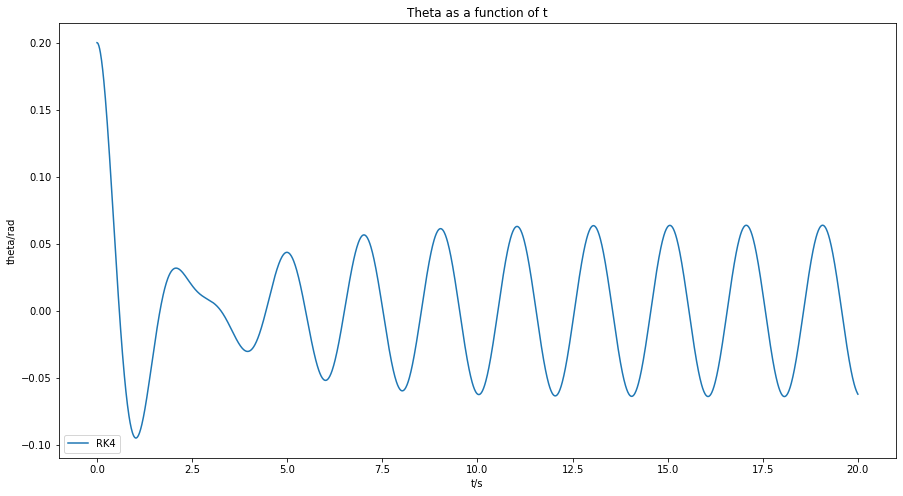

In [4]:

dt=0.01
T= 20

theta_RK4, w_RK4, t = RK4_method(k, f, theta_0, w_0, dt, T)
plt.figure(figsize = (15,8))
plt.plot(t, theta_RK4, label = "RK4")

plt.title("Theta as a function of t")
plt.xlabel("t/s")
plt.ylabel("theta/rad")
plt.legend(loc="lower left")

plt.show()

In [5]:

def K (w): #calculates kinetic energy per unit of mass
    return 0.5*l**2*w**2

def U(theta): #calculates potential energy per unit of mass
    return 0.5*g*l*theta**2

def E_tot(theta,w ): #calculates mechanical energy per unit of mass
    return U(theta) + K(w)

dt_conv =0.0001 #we chose a dt that we know is smaller than what we need
T= 20

theta, w, t = RK4_method(k, f, theta_0, w_0, dt_conv, T)

E_conv = E_tot(theta[-1], w[-1]) #calculates the energy of the system after 20s to use for the convergencetest

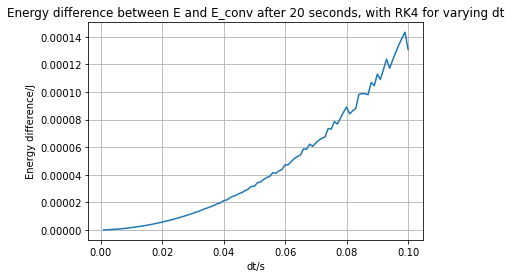

In [6]:

#plots the absolute value of the difference between E_conv and the energy of the system after 20s with dt from 0.001 to 0.1
n=100
dt_vals = np.linspace(0.001, 0.1, n)
error = np.zeros(n)
for i in range (n):
    theta, w, t = RK4_method(k, f, theta_0, w_0, dt_vals[i], T)
    error[i] = abs(E_conv - E_tot(theta[-1],w[-1]))

plt.plot(dt_vals, error)
plt.grid('on')
plt.xlabel("dt/s")
plt.title("Energy difference between E and E_conv after 20 seconds, with RK4 for varying dt")
plt.ylabel("Energy difference/J")
plt.show()





As we can see from the plot, the energy differnce per unit mass after 20 seconds for $dt = 0.01$ and $dt_{conv} = 0.0001$ is less than $0.00001 J/kg$ which we think is accurate enough for our purposes. Using $dt = 0.01$ the code still runs quite fast as the task is not very computationally demanding, and therefore runtime is not really an issue. Because of this we think $dt = 0.01$ is a suitable step size and will continue using it in our project. 

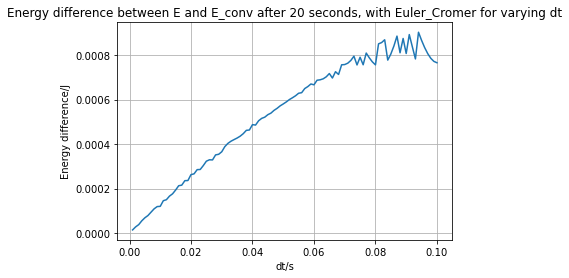

In [7]:
def euler_cromer_approx(k, f, theta_0, w_0, dt, T):
    """
    Calculates angular displacement and angular velocity 
    using the Euler-Cromer method 
    """
    N = int(T/dt)
    theta = np.zeros(N+1)
    w = np.zeros(N+1)
    t = np.linspace(0, T, N + 1)
    theta[0] = theta_0
    w[0] = w_0
    for i in range(N):
        w[i+1] = w[i] + (F_Dml*np.sin(w_D*t[i]) - g/l*theta[i] - q*w[i])*dt
        theta[i+1] = theta[i] + w[i+1]*dt
    return theta, w, t 

n=100
dt_vals = np.linspace(0.001, 0.1, n)
error = np.zeros(n)
for i in range (n):
    theta, w, t = euler_cromer_approx(k, f, theta_0, w_0, dt_vals[i], T)
    error[i] = abs(E_conv - E_tot(theta[-1],w[-1]))

plt.plot(dt_vals, error)
plt.grid('on')
plt.xlabel("dt/s")
plt.title("Energy difference between E and E_conv after 20 seconds, with Euler_Cromer for varying dt")
plt.ylabel("Energy difference/J")
plt.show()


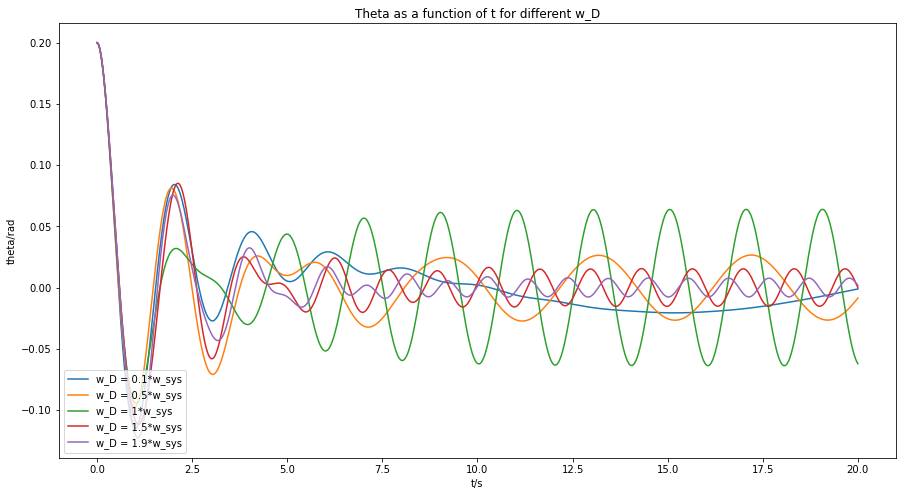

In [8]:
dt = 0.01
T = 20

#Changes the value of w_D and plots the angle as function of time up to 20s
w_D = 0.1 * w_sys
theta_RK4, w_RK4, t = RK4_method(k, f, theta_0, w_0, dt, T)
plt.figure(figsize = (15,8))
plt.plot(t, theta_RK4, label = "w_D = 0.1*w_sys" )

w_D = 0.5 * w_sys
theta_RK4, w_RK4, t = RK4_method(k, f, theta_0, w_0, dt, T)
plt.plot(t, theta_RK4, label = "w_D = 0.5*w_sys" )

w_D = 1 * w_sys
theta_RK4, w_RK4, t = RK4_method(k, f, theta_0, w_0, dt, T)
plt.plot(t, theta_RK4, label = "w_D = 1*w_sys" )

w_D = 1.5 * w_sys
theta_RK4, w_RK4, t = RK4_method(k, f, theta_0, w_0, dt, T)
plt.plot(t, theta_RK4, label = "w_D = 1.5*w_sys" )

w_D = 1.9 * w_sys
theta_RK4, w_RK4, t = RK4_method(k, f, theta_0, w_0, dt, T)
plt.plot(t, theta_RK4, label = "w_D = 1.9*w_sys" )

plt.title("Theta as a function of t for different w_D")
plt.xlabel("t/s")
plt.ylabel("theta/rad")
plt.legend(loc="lower left")

plt.show()

From the plot we can see that the amplitude of $\theta$ is largest when $w_D$ is equal to the natural frequency of the system, being $\sqrt{g/l}$. The further $w_D$ deviates from this value the amplitude seems to decrease. We also notice that larger values for $w_d$ seem to have a smaller amplitude if they deviate from the natural frequency by the same amount. This is most clearly seen for $w_D = 0.5*w_{sys}$ and $w_D = 1.5*w_{sys}$.

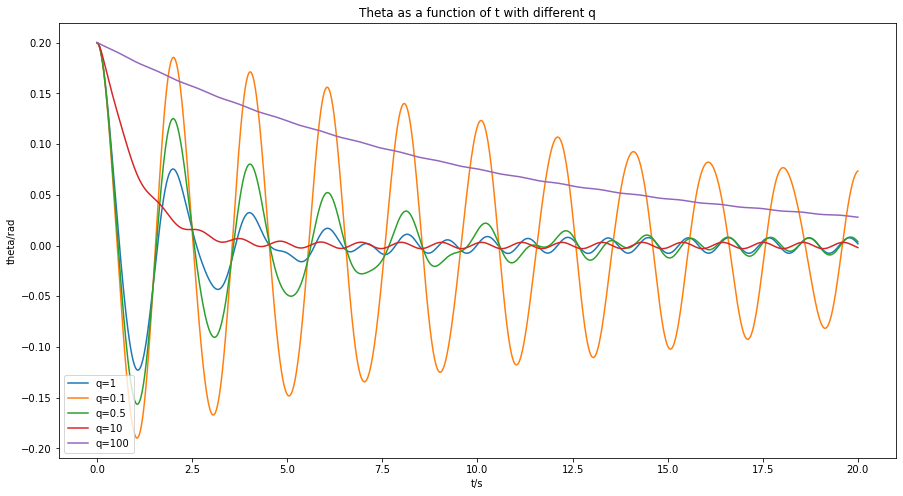

In [9]:
dt=0.01
T= 20

#Changes the value of q and plots the angle as function of time up to 20s
plt.figure(figsize = (15,8))
q=1
theta_RK4, w_RK4, t = RK4_method(k, f, theta_0, w_0, dt, T)
plt.plot(t, theta_RK4, label = "q=1")

q = 0.1
theta_RK4, w_RK4, t = RK4_method(k, f, theta_0, w_0, dt, T)
plt.plot(t, theta_RK4, label = "q=0.1")

q = 0.5
theta_RK4, w_RK4, t = RK4_method(k, f, theta_0, w_0, dt, T)
plt.plot(t, theta_RK4, label = "q=0.5")

q = 10
theta_RK4, w_RK4, t = RK4_method(k, f, theta_0, w_0, dt, T)
plt.plot(t, theta_RK4, label = "q=10")

q = 100
theta_RK4, w_RK4, t = RK4_method(k, f, theta_0, w_0, dt, T)
plt.plot(t, theta_RK4, label = "q=100")


plt.title("Theta as a function of t with different q")
plt.xlabel("t/s")
plt.ylabel("theta/rad")
plt.legend(loc="lower left")
plt.show()

As the plot clearly shows, the amplitude decreases for higher values of $q$. With $q = 100$ the oscilations are almost completly dampened and the angle is slowly decreasing to zero. 

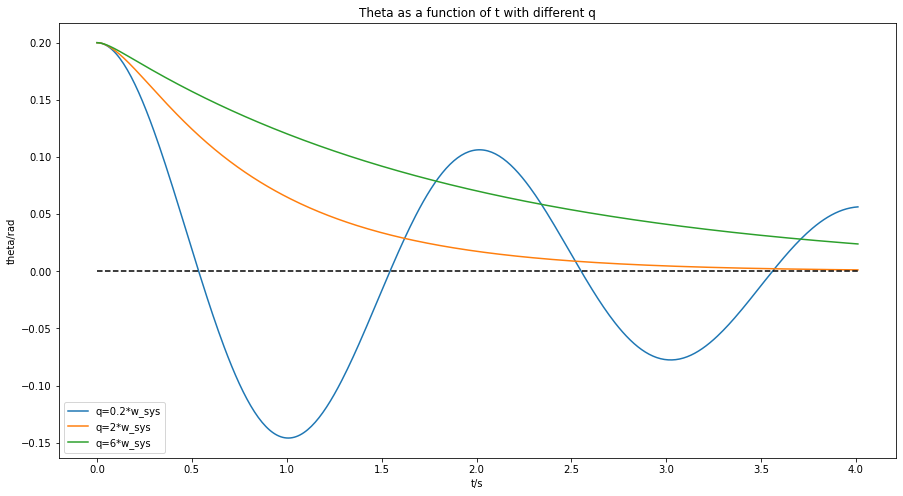

In [10]:
F_Dml = 0 #sets the harmonic force to zero
dt = 0.01
T = 4

#Plots the angle as a function of time up to 4s, for different q such that the first is underdamped, second critically damped and third over-damped
plt.figure(figsize = (15,8))
q=0.2*w_sys
theta_RK4, w_RK4, t = RK4_method(k, f, theta_0, w_0, dt, T)
plt.plot(t, theta_RK4, label = "q=0.2*w_sys")

q=2**w_sys
theta_RK4, w_RK4, t = RK4_method(k, f, theta_0, w_0, dt, T)
plt.plot(t, theta_RK4, label = "q=2*w_sys")


q=6*w_sys
theta_RK4, w_RK4, t = RK4_method(k, f, theta_0, w_0, dt, T)
plt.plot(t, theta_RK4, label = "q=6*w_sys")

plt.plot(t, np.zeros(len(t)), 'k--')
plt.title("Theta as a function of t with different q")
plt.xlabel("t/s")
plt.ylabel("theta/rad")
plt.legend(loc="lower left")
plt.show()


The plot above shows the angle $\theta$ as a function of time for three different values of $q$. $q=0.5*w_{sys}$ is under damped, $q=2*w_{sys}$ is critically damped and $q=6*w_{sys}$ is over damped. 